In [2]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from photutils.segmentation import deblend_sources
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
#Abrimos los datos de los fits
img_b = fits.open('Img_B.fits')[0].data
img_v = fits.open('Img_V.fits')[0].data
hdr_b = fits.open('Img_B.fits')[0].header
hdr_v = fits.open('Img_V.fits')[0].header

In [101]:
#Threshold para detectar fuentes
threshold_b = detect_threshold(img_b, nsigma = 2)
threshold_v = detect_threshold(img_v, nsigma = 2.1)

#Detectamos fuentes
sour_b = detect_sources(img_b, threshold_b, npixels = 329)
sour_v = detect_sources(img_v, threshold_v, npixels = 502)
#Es arreglo de npixeles para que queden iguales la cantidad de fuente
print(sour_b, sour_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 230
labels: [  1   2   3   4   5 ... 226 227 228 229 230] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 230
labels: [  1   2   3   4   5 ... 226 227 228 229 230]


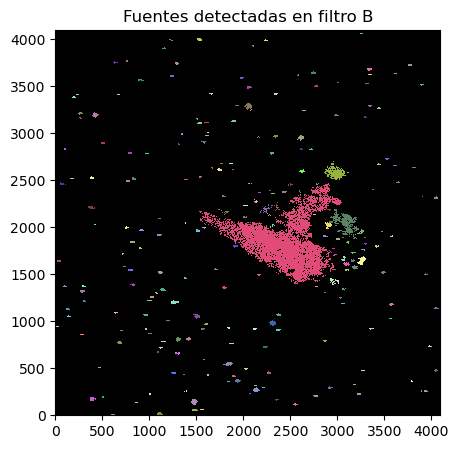

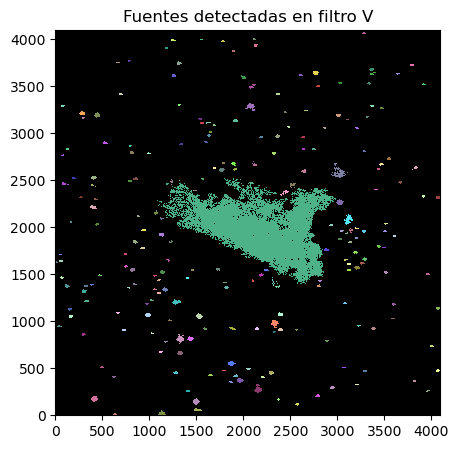

In [102]:
#Mapa de colores
cmap_sour_b = sour_b.make_cmap(seed=123)
cmap_sour_v = sour_v.make_cmap(seed=123)

#Graficamos fuentes
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_b, origin='lower', cmap=cmap_sour_b, interpolation='nearest')
plt.title('Fuentes detectadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_v, origin='lower', cmap=cmap_sour_v, interpolation='nearest')
plt.title('Fuentes detectadas en filtro V')
plt.show()

In [103]:
#Separamos fuentes
from photutils.segmentation import detect_sources, deblend_sources
deblend_b = deblend_sources(img_b, sour_b, npixels=100, nlevels=32, contrast=1)
deblend_v = deblend_sources(img_v, sour_v, npixels=150, nlevels=32, contrast=1)

print(deblend_b, deblend_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 230
labels: [  1   2   3   4   5 ... 226 227 228 229 230] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 230
labels: [  1   2   3   4   5 ... 226 227 228 229 230]


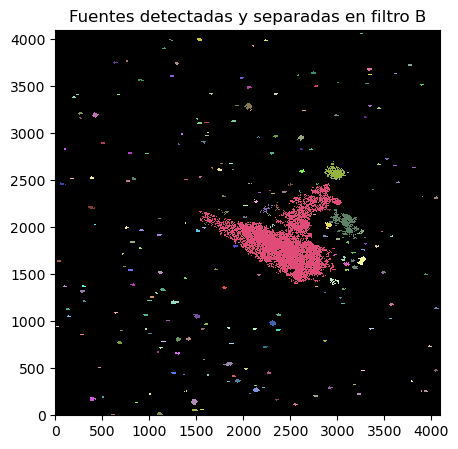

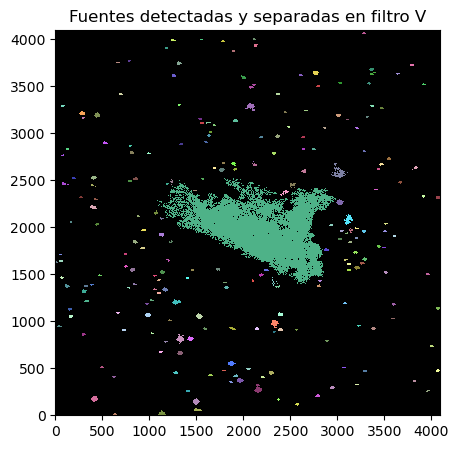

In [104]:
cmap_deblend_b = deblend_b.make_cmap(seed=123)
cmap_deblend_v = deblend_v.make_cmap(seed=123)

#Las vemos

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_b, origin='lower', cmap=cmap_deblend_b,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_v, origin='lower', cmap=cmap_deblend_v,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro V')
plt.show()

In [105]:
#Catalogo
cat_b = SourceCatalog(img_b, deblend_b)
cat_v = SourceCatalog(img_v, deblend_v)
tbl_b = cat_b.to_table()
tbl_v = cat_b.to_table()
print(tbl_b)
print(tbl_v)

label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  615.8714108430142  5.142450591210032 ...  57967.03553822655          nan
    2 1111.2257298826755  8.021422733219069 ... 492632.61275219393          nan
    3  1481.419669518392  53.61874803567602 ...  308108.2150364585          nan
    4 1559.2713823620425   55.4124513566408 ...   139283.465944254          nan
    5  1478.637749523913  140.3926287359344 ...  805816.1496793348          nan
    6 2553.6783317732425 111.71082004421272 ...  175458.9296242524          nan
    7  861.7871906746984  131.6127622992465 ... 182867.95589869213          nan
    8  397.6676157847391 170.42045104812146 ... 458015.61521220626          nan
    9 2357.0615170564206 163.63838514595943 ... 142523.40265944632          nan
  ...                ...                

In [106]:
#Tablas
tabla_b = cat_b.to_table()['label','xcentroid','ycentroid','area','segment_flux']
tabla_v = cat_v.to_table()['label','xcentroid','ycentroid','area','segment_flux']

#Printeo las tablas con los datos
print(tabla_b, tabla_v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  615.8714108430142  5.142450591210032  392.0  16852.95620727539
    2 1111.2257298826755  8.021422733219069 1516.0 492043.03288269043
    3  1481.419669518392  53.61874803567602 1186.0  68768.43424987793
    4 1559.2713823620425   55.4124513566408  383.0  13219.10757637024
    5  1478.637749523913  140.3926287359344 3185.0   802498.744840622
    6 2553.6783317732425 111.71082004421272  873.0  55445.62781524658
    7  861.7871906746984  131.6127622992465  420.0 13344.310663223267
    8  397.6676157847391 170.42045104812146 2088.0  422582.4799041748
    9 2357.0615170564206 163.63838514595943  465.0  17964.12349319458
  ...                ...                ...    ...                ...
  221 1294.9676210853072  3740.568011667957  996.0   79437.0156288147
  222  640.974125024

In [107]:
#Flujo real
tabla_b['segment_flux'] = tabla_b['segment_flux']/hdr_b['EXPTIME']
tabla_v['segment_flux'] = tabla_v['segment_flux']/hdr_v['EXPTIME']

print(tabla_b, tabla_v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  615.8714108430142  5.142450591210032  392.0  561.7652069091797
    2 1111.2257298826755  8.021422733219069 1516.0 16401.434429423014
    3  1481.419669518392  53.61874803567602 1186.0 2292.2811416625977
    4 1559.2713823620425   55.4124513566408  383.0  440.6369192123413
    5  1478.637749523913  140.3926287359344 3185.0 26749.958161354065
    6 2553.6783317732425 111.71082004421272  873.0 1848.1875938415528
    7  861.7871906746984  131.6127622992465  420.0 444.81035544077554
    8  397.6676157847391 170.42045104812146 2088.0 14086.082663472493
    9 2357.0615170564206 163.63838514595943  465.0  598.8041164398194
  ...                ...                ...    ...                ...
  221 1294.9676210853072  3740.568011667957  996.0 2647.9005209604898
  222  640.974125024

In [108]:
#Magnitudes con los zeropoint de la calibracion
zp_b = 39.022104169660096
zp_v = 39.34044722557779

tabla_b['magnitude'] = zp_b - 2.5 * np.log(tabla_b['segment_flux'])
tabla_v['magnitude'] = zp_v - 2.5 * np.log(tabla_v['segment_flux'])
print(tabla_b, tabla_v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1  615.8714108430142 ...  561.7652069091797 23.194394216414153
    2 1111.2257298826755 ... 16401.434429423014 14.759293981669718
    3  1481.419669518392 ... 2292.2811416625977 19.678847338488346
    4 1559.2713823620425 ...  440.6369192123413 23.801551109921732
    5  1478.637749523913 ... 26749.958161354065 13.536383699006599
    6 2553.6783317732425 ... 1848.1875938415528 20.217202272488407
    7  861.7871906746984 ... 444.81035544077554  23.77798411020454
    8  397.6676157847391 ... 14086.082663472493 15.139747810228538
    9 2357.0615170564206 ...  598.8041164398194 23.034767852150495
  ...                ... ...                ...                ...
  221 1294.9676210853072 ... 2647.9005209604898  19.31829829781482
  222  640.9741250241849 ... 1821.2795897801718  20.2538676588

In [109]:
print(f"Magnitud filtro B: {np.sort(tabla_b['magnitude'])}")
print(f"Magnitud filtro V: {np.sort(tabla_v['magnitude'])}")


Magnitud filtro B:     magnitude     
------------------
 5.951917130016149
  12.2625900045105
 12.83780957226806
13.153274850228769
13.536383699006599
13.753411388104066
14.365829011392105
14.413030442778304
14.490188905408356
14.759293981669718
               ...
 24.17957293702788
 24.24398850565781
24.263936213631055
24.284518336893598
 24.28558861405794
 24.28926751964073
24.296047778616106
 24.32071049698616
24.347102883283906
24.440476596514976
Length = 230 rows
Magnitud filtro V:     magnitude     
------------------
 3.157256471241844
10.241093472811116
10.689505981243236
11.140482530834923
11.294685368077637
11.401522472801268
 11.64996728892693
11.836893476058904
11.981296225357866
12.443377873766309
               ...
21.755291832660816
21.802244358713875
 21.81596527673807
 21.81804482460027
21.848286235256346
 21.88372610729306
22.005471473032987
 22.04495124185621
22.091639893249198
 22.45364977362416
Length = 230 rows


In [110]:
B_V = tabla_v['magnitude']-tabla_b['magnitude']

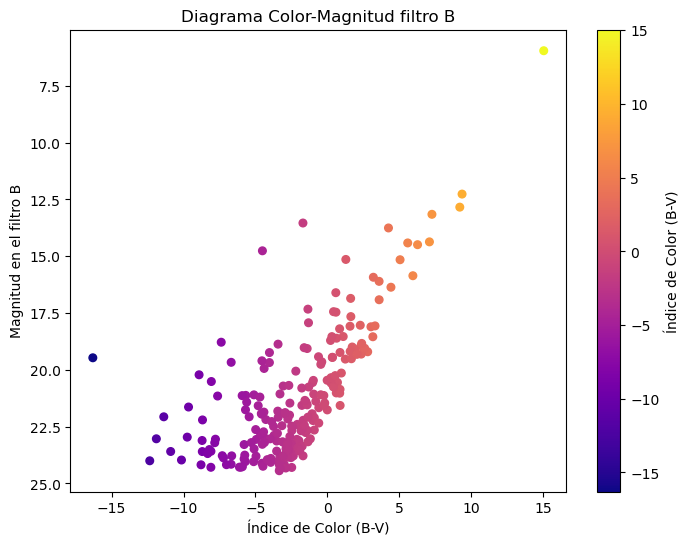

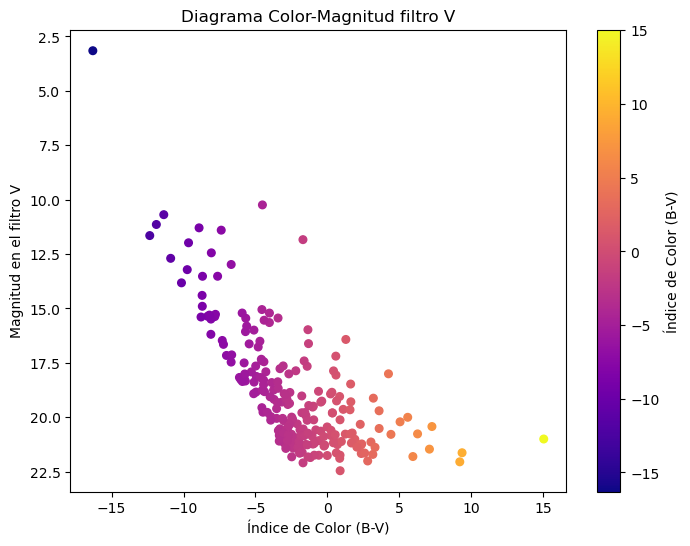

In [111]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_b['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro B")
plt.title("Diagrama Color-Magnitud filtro B")

plt.show()

# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_v['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro V")
plt.title("Diagrama Color-Magnitud filtro V")

plt.show()